In [1]:
!pip install keras

In [2]:
!pip install tensorflow

  Using cached tensorflow-2.8.0-cp38-cp38-win_amd64.whl (438.0 MB)


In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [4]:
data = pd.read_csv("forestfires.csv")
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
data['size_category'].unique()

array(['small', 'large'], dtype=object)

In [6]:
data.size_category.replace(('small','large'),(1,2),inplace=True)

In [7]:
data.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,1
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,1
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,1
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,1
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,1


In [8]:
data.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689,1.268859
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632,0.443796
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [10]:
data.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [11]:
data.tail()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,2
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,2
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,2
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,1
516,nov,tue,79.5,3.0,106.7,1.1,11.8,31,4.5,0.0,...,0,0,0,0,0,0,1,0,0,1


In [12]:
data1 =data.drop(['month','day'],axis=1)
data1

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,2
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,2
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,2
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


In [13]:
data1[data1.duplicated()].shape

(8, 29)

In [14]:
array = data1.values

In [15]:
array

array([[ 86.2,  26.2,  94.3, ...,   0. ,   0. ,   1. ],
       [ 90.6,  35.4, 669.1, ...,   1. ,   0. ,   1. ],
       [ 90.6,  43.7, 686.9, ...,   1. ,   0. ,   1. ],
       ...,
       [ 81.6,  56.7, 665.6, ...,   0. ,   0. ,   2. ],
       [ 94.4, 146. , 614.7, ...,   0. ,   0. ,   1. ],
       [ 79.5,   3. , 106.7, ...,   0. ,   0. ,   1. ]])

In [16]:
x = array[:,0:28]
y = array[:,28]

In [17]:
model = Sequential()
model.add(Dense(30,input_dim=28,activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x,y, validation_split=0.33, epochs=250, batch_size=10)

Epoch 1/250
35/35 [==============================] - 1s 16ms/step - loss: 32.5690 - accuracy: 0.2197 - val_loss: -12.3288 - val_accuracy: 0.6667
Epoch 2/250
35/35 [==============================] - 0s 6ms/step - loss: -14.6998 - accuracy: 0.7514 - val_loss: -35.5944 - val_accuracy: 0.6784
Epoch 3/250
35/35 [==============================] - 0s 4ms/step - loss: -32.3246 - accuracy: 0.7572 - val_loss: -75.1000 - val_accuracy: 0.6784
Epoch 4/250
35/35 [==============================] - 0s 5ms/step - loss: -65.8695 - accuracy: 0.7572 - val_loss: -146.1951 - val_accuracy: 0.6784
Epoch 5/250
35/35 [==============================] - 0s 6ms/step - loss: -122.8311 - accuracy: 0.7572 - val_loss: -250.5533 - val_accuracy: 0.6784
Epoch 6/250
35/35 [==============================] - 0s 6ms/step - loss: -224.9241 - accuracy: 0.7572 - val_loss: -464.1297 - val_accuracy: 0.6784
Epoch 7/250
35/35 [==============================] - 0s 6ms/step - loss: -394.7020 - accuracy: 0.7572 - val_loss: -800.8618 -

Epoch 55/250
35/35 [==============================] - 0s 6ms/step - loss: -410403.8438 - accuracy: 0.7572 - val_loss: -654024.0625 - val_accuracy: 0.6784
Epoch 56/250
35/35 [==============================] - 0s 5ms/step - loss: -431367.8125 - accuracy: 0.7572 - val_loss: -684218.9375 - val_accuracy: 0.6784
Epoch 57/250
35/35 [==============================] - 0s 5ms/step - loss: -452109.9062 - accuracy: 0.7572 - val_loss: -718350.7500 - val_accuracy: 0.6784
Epoch 58/250
35/35 [==============================] - 0s 5ms/step - loss: -473714.8750 - accuracy: 0.7572 - val_loss: -752183.7500 - val_accuracy: 0.6784
Epoch 59/250
35/35 [==============================] - 0s 6ms/step - loss: -495870.1562 - accuracy: 0.7572 - val_loss: -785520.2500 - val_accuracy: 0.6784
Epoch 60/250
35/35 [==============================] - 0s 5ms/step - loss: -518304.4688 - accuracy: 0.7572 - val_loss: -821981.3750 - val_accuracy: 0.6784
Epoch 61/250
35/35 [==============================] - 0s 5ms/step - loss: -5

Epoch 108/250
35/35 [==============================] - 0s 5ms/step - loss: -2358786.2500 - accuracy: 0.7572 - val_loss: -3698490.5000 - val_accuracy: 0.6784
Epoch 109/250
35/35 [==============================] - 0s 6ms/step - loss: -2411547.2500 - accuracy: 0.7572 - val_loss: -3786420.0000 - val_accuracy: 0.6784
Epoch 110/250
35/35 [==============================] - 0s 5ms/step - loss: -2467402.7500 - accuracy: 0.7572 - val_loss: -3869970.2500 - val_accuracy: 0.6784
Epoch 111/250
35/35 [==============================] - 0s 4ms/step - loss: -2523112.2500 - accuracy: 0.7572 - val_loss: -3955102.2500 - val_accuracy: 0.6784
Epoch 112/250
35/35 [==============================] - 0s 5ms/step - loss: -2579252.0000 - accuracy: 0.7572 - val_loss: -4044714.2500 - val_accuracy: 0.6784
Epoch 113/250
35/35 [==============================] - 0s 6ms/step - loss: -2636376.7500 - accuracy: 0.7572 - val_loss: -4138157.7500 - val_accuracy: 0.6784
Epoch 114/250
35/35 [==============================] - 0s 

35/35 [==============================] - 0s 6ms/step - loss: -6227193.5000 - accuracy: 0.7572 - val_loss: -9729996.0000 - val_accuracy: 0.6784
Epoch 161/250
35/35 [==============================] - 0s 6ms/step - loss: -6323246.5000 - accuracy: 0.7572 - val_loss: -9886222.0000 - val_accuracy: 0.6784
Epoch 162/250
35/35 [==============================] - 0s 4ms/step - loss: -6421788.0000 - accuracy: 0.7572 - val_loss: -10036897.0000 - val_accuracy: 0.6784
Epoch 163/250
35/35 [==============================] - 0s 5ms/step - loss: -6520575.5000 - accuracy: 0.7572 - val_loss: -10184707.0000 - val_accuracy: 0.6784
Epoch 164/250
35/35 [==============================] - 0s 5ms/step - loss: -6617484.0000 - accuracy: 0.7572 - val_loss: -10341870.0000 - val_accuracy: 0.6784
Epoch 165/250
35/35 [==============================] - 0s 6ms/step - loss: -6719523.0000 - accuracy: 0.7572 - val_loss: -10496476.0000 - val_accuracy: 0.6784
Epoch 166/250
35/35 [==============================] - 0s 5ms/step -

Epoch 212/250
35/35 [==============================] - 0s 5ms/step - loss: -12457392.0000 - accuracy: 0.7572 - val_loss: -19426256.0000 - val_accuracy: 0.6784
Epoch 213/250
35/35 [==============================] - 0s 6ms/step - loss: -12600401.0000 - accuracy: 0.7572 - val_loss: -19664830.0000 - val_accuracy: 0.6784
Epoch 214/250
35/35 [==============================] - 0s 6ms/step - loss: -12748836.0000 - accuracy: 0.7572 - val_loss: -19892680.0000 - val_accuracy: 0.6784
Epoch 215/250
35/35 [==============================] - 0s 5ms/step - loss: -12896215.0000 - accuracy: 0.7572 - val_loss: -20115142.0000 - val_accuracy: 0.6784
Epoch 216/250
35/35 [==============================] - 0s 5ms/step - loss: -13041605.0000 - accuracy: 0.7572 - val_loss: -20352318.0000 - val_accuracy: 0.6784
Epoch 217/250
35/35 [==============================] - 0s 4ms/step - loss: -13191829.0000 - accuracy: 0.7572 - val_loss: -20573290.0000 - val_accuracy: 0.6784
Epoch 218/250
35/35 [=========================

In [19]:
score = model.evaluate(x,y)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

17/17 [==============================] - 0s 4ms/step - loss: -22237684.0000 - accuracy: 0.7311
accuracy: 73.11%


In [20]:
model.metrics_names

['loss', 'accuracy']

In [21]:
model.history.history.keys()

dict_keys([])

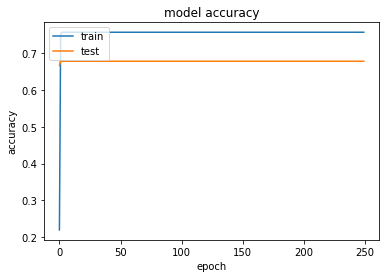

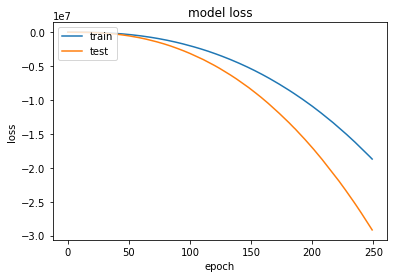

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
arr = data1.values

In [24]:
x = arr[:,0:28]
y = arr[:,28]

In [25]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale.fit(x)
x_standardized = scale.transform(x)

In [26]:
pd.DataFrame(x_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16,4.874674e-17,...,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,-2.596515e-16,1.443075e-16,6.253326e-16,4.024290e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01,2.254407e+00,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


 TUNING OF PARAMETER

In [27]:
from sklearn.model_selection import GridSearchCV, KFold
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [28]:
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [29]:
model = KerasClassifier(build_fn = create_model,verbose = 0)
batch_size = [10,20,40]
epochs = [10,50,100,150]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)

<ipython-input-29-a0d5756fc637>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0)
C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END .................batch_size=10, epochs=10; total time=   2.2s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END .................batch_size=10, epochs=10; total time=   2.1s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END .................batch_size=10, epochs=10; total time=   2.3s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END .................batch_size=10, epochs=10; total time=   2.0s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END .................batch_size=10, epochs=10; total time=   2.1s
[CV 1/5; 2/12] START batch_size=10, epochs=50...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END .................batch_size=10, epochs=50; total time=   5.9s
[CV 2/5; 2/12] START batch_size=10, epochs=50...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END .................batch_size=10, epochs=50; total time=   6.1s
[CV 3/5; 2/12] START batch_size=10, epochs=50...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END .................batch_size=10, epochs=50; total time=   6.4s
[CV 4/5; 2/12] START batch_size=10, epochs=50...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END .................batch_size=10, epochs=50; total time=   6.1s
[CV 5/5; 2/12] START batch_size=10, epochs=50...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END .................batch_size=10, epochs=50; total time=   5.8s
[CV 1/5; 3/12] START batch_size=10, epochs=100..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END ................batch_size=10, epochs=100; total time=  11.1s
[CV 2/5; 3/12] START batch_size=10, epochs=100..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END ................batch_size=10, epochs=100; total time=  10.6s
[CV 3/5; 3/12] START batch_size=10, epochs=100..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END ................batch_size=10, epochs=100; total time=  10.9s
[CV 4/5; 3/12] START batch_size=10, epochs=100..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END ................batch_size=10, epochs=100; total time=  10.5s
[CV 5/5; 3/12] START batch_size=10, epochs=100..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END ................batch_size=10, epochs=100; total time=  11.9s
[CV 1/5; 4/12] START batch_size=10, epochs=150..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END ................batch_size=10, epochs=150; total time=  16.2s
[CV 2/5; 4/12] START batch_size=10, epochs=150..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END ................batch_size=10, epochs=150; total time=  16.0s
[CV 3/5; 4/12] START batch_size=10, epochs=150..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END ................batch_size=10, epochs=150; total time=  17.5s
[CV 4/5; 4/12] START batch_size=10, epochs=150..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END ................batch_size=10, epochs=150; total time=  16.7s
[CV 5/5; 4/12] START batch_size=10, epochs=150..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END ................batch_size=10, epochs=150; total time=  16.5s
[CV 1/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END .................batch_size=20, epochs=10; total time=   1.7s
[CV 2/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END .................batch_size=20, epochs=10; total time=   2.4s
[CV 3/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END .................batch_size=20, epochs=10; total time=   1.8s
[CV 4/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END .................batch_size=20, epochs=10; total time=   2.0s
[CV 5/5; 5/12] START batch_size=20, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END .................batch_size=20, epochs=10; total time=   2.0s
[CV 1/5; 6/12] START batch_size=20, epochs=50...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END .................batch_size=20, epochs=50; total time=   3.9s
[CV 2/5; 6/12] START batch_size=20, epochs=50...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END .................batch_size=20, epochs=50; total time=   3.8s
[CV 3/5; 6/12] START batch_size=20, epochs=50...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END .................batch_size=20, epochs=50; total time=   4.3s
[CV 4/5; 6/12] START batch_size=20, epochs=50...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END .................batch_size=20, epochs=50; total time=   4.0s
[CV 5/5; 6/12] START batch_size=20, epochs=50...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END .................batch_size=20, epochs=50; total time=   4.1s
[CV 1/5; 7/12] START batch_size=20, epochs=100..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END ................batch_size=20, epochs=100; total time=   6.5s
[CV 2/5; 7/12] START batch_size=20, epochs=100..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END ................batch_size=20, epochs=100; total time=   7.0s
[CV 3/5; 7/12] START batch_size=20, epochs=100..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END ................batch_size=20, epochs=100; total time=   6.5s
[CV 4/5; 7/12] START batch_size=20, epochs=100..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END ................batch_size=20, epochs=100; total time=   6.2s
[CV 5/5; 7/12] START batch_size=20, epochs=100..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END ................batch_size=20, epochs=100; total time=   6.6s
[CV 1/5; 8/12] START batch_size=20, epochs=150..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END ................batch_size=20, epochs=150; total time=   8.7s
[CV 2/5; 8/12] START batch_size=20, epochs=150..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END ................batch_size=20, epochs=150; total time=   8.9s
[CV 3/5; 8/12] START batch_size=20, epochs=150..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END ................batch_size=20, epochs=150; total time=   8.5s
[CV 4/5; 8/12] START batch_size=20, epochs=150..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END ................batch_size=20, epochs=150; total time=   8.5s
[CV 5/5; 8/12] START batch_size=20, epochs=150..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END ................batch_size=20, epochs=150; total time=   8.2s
[CV 1/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END .................batch_size=40, epochs=10; total time=   1.9s
[CV 2/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END .................batch_size=40, epochs=10; total time=   1.4s
[CV 3/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END .................batch_size=40, epochs=10; total time=   1.5s
[CV 4/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END .................batch_size=40, epochs=10; total time=   1.3s
[CV 5/5; 9/12] START batch_size=40, epochs=10...................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END .................batch_size=40, epochs=10; total time=   1.5s
[CV 1/5; 10/12] START batch_size=40, epochs=50..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END ................batch_size=40, epochs=50; total time=   2.4s
[CV 2/5; 10/12] START batch_size=40, epochs=50..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END ................batch_size=40, epochs=50; total time=   2.5s
[CV 3/5; 10/12] START batch_size=40, epochs=50..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END ................batch_size=40, epochs=50; total time=   2.5s
[CV 4/5; 10/12] START batch_size=40, epochs=50..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END ................batch_size=40, epochs=50; total time=   2.4s
[CV 5/5; 10/12] START batch_size=40, epochs=50..................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END ................batch_size=40, epochs=50; total time=   2.5s
[CV 1/5; 11/12] START batch_size=40, epochs=100.................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END ...............batch_size=40, epochs=100; total time=   4.6s
[CV 2/5; 11/12] START batch_size=40, epochs=100.................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END ...............batch_size=40, epochs=100; total time=   3.7s
[CV 3/5; 11/12] START batch_size=40, epochs=100.................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END ...............batch_size=40, epochs=100; total time=   3.9s
[CV 4/5; 11/12] START batch_size=40, epochs=100.................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END ...............batch_size=40, epochs=100; total time=   3.8s
[CV 5/5; 11/12] START batch_size=40, epochs=100.................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END ...............batch_size=40, epochs=100; total time=   3.7s
[CV 1/5; 12/12] START batch_size=40, epochs=150.................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END ...............batch_size=40, epochs=150; total time=   5.4s
[CV 2/5; 12/12] START batch_size=40, epochs=150.................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END ...............batch_size=40, epochs=150; total time=   5.2s
[CV 3/5; 12/12] START batch_size=40, epochs=150.................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END ...............batch_size=40, epochs=150; total time=   5.2s
[CV 4/5; 12/12] START batch_size=40, epochs=150.................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END ...............batch_size=40, epochs=150; total time=   5.1s
[CV 5/5; 12/12] START batch_size=40, epochs=150.................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END ...............batch_size=40, epochs=150; total time=   5.5s


In [30]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9206497430801391, using {'batch_size': 10, 'epochs': 150}
0.8761575818061829,0.07138763154797943 with: {'batch_size': 10, 'epochs': 10}
0.9148244976997375,0.045416659364301386 with: {'batch_size': 10, 'epochs': 50}
0.9090179085731507,0.04827133167881923 with: {'batch_size': 10, 'epochs': 100}
0.9206497430801391,0.044965804768234446 with: {'batch_size': 10, 'epochs': 150}
0.852875292301178,0.0799166551611001 with: {'batch_size': 20, 'epochs': 10}
0.8993651986122131,0.05737087251153422 with: {'batch_size': 20, 'epochs': 50}
0.9186706423759461,0.04173174522257141 with: {'batch_size': 20, 'epochs': 100}
0.9129387497901916,0.053425597900588734 with: {'batch_size': 20, 'epochs': 150}
0.8082711100578308,0.10636370635361593 with: {'batch_size': 40, 'epochs': 10}
0.9012509226799011,0.050900469711939414 with: {'batch_size': 40, 'epochs': 50}
0.9070761680603028,0.04981991855097965 with: {'batch_size': 40, 'epochs': 100}
0.9051157593727112,0.049824595887076294 with: {'batch_size': 40, 'ep

Learning rate and Drop out rate

In [31]:
from tensorflow.keras.layers import Dropout

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


<ipython-input-31-7de7ce0011b0>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)
C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   2.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   2.3s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   2.5s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   2.6s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END .....dropout_rate=0.0, learning_rate=0.001; total time=   2.8s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   2.5s
[CV 2/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   2.6s
[CV 3/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   3.2s
[CV 4/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   2.6s
[CV 5/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ......dropout_rate=0.0, learning_rate=0.01; total time=   2.4s
[CV 1/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   2.7s
[CV 2/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   2.3s
[CV 3/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   2.5s
[CV 4/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   2.4s
[CV 5/5; 3/9] START dropout_rate=0.0, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END .......dropout_rate=0.0, learning_rate=0.1; total time=   2.7s
[CV 1/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   2.5s
[CV 2/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   2.6s
[CV 3/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   3.0s
[CV 4/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   2.6s
[CV 5/5; 4/9] START dropout_rate=0.1, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END .....dropout_rate=0.1, learning_rate=0.001; total time=   2.7s
[CV 1/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   2.9s
[CV 2/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   2.5s
[CV 3/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   2.8s
[CV 4/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   2.7s
[CV 5/5; 5/9] START dropout_rate=0.1, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ......dropout_rate=0.1, learning_rate=0.01; total time=   2.7s
[CV 1/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   2.7s
[CV 2/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   2.5s
[CV 3/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   3.2s
[CV 4/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   2.7s
[CV 5/5; 6/9] START dropout_rate=0.1, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END .......dropout_rate=0.1, learning_rate=0.1; total time=   2.4s
[CV 1/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   2.7s
[CV 2/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   2.5s
[CV 3/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   2.6s
[CV 4/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   2.3s
[CV 5/5; 7/9] START dropout_rate=0.2, learning_rate=0.001.......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....dropout_rate=0.2, learning_rate=0.001; total time=   2.2s
[CV 1/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   2.7s
[CV 2/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   2.3s
[CV 3/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   2.2s
[CV 4/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   2.3s
[CV 5/5; 8/9] START dropout_rate=0.2, learning_rate=0.01........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END ......dropout_rate=0.2, learning_rate=0.01; total time=   2.3s
[CV 1/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   2.4s
[CV 2/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   2.3s
[CV 3/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   2.2s
[CV 4/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   2.4s
[CV 5/5; 9/9] START dropout_rate=0.2, learning_rate=0.1.........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .......dropout_rate=0.2, learning_rate=0.1; total time=   2.5s


In [33]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9245145678520202, using {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8024831891059876,0.09800072772777653 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9050970792770385,0.048739894649491675 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.8779686450958252,0.057066729436907764 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.7869678735733032,0.10771291624612692 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9089245676994324,0.04738262010177626 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.897386109828949,0.05355345381628222 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.7927371144294739,0.10840287940731674 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9245145678520202,0.04107897458283625 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.8295369744300842,0.1407850058979792 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


Activation Function and Kernel Initializer

In [34]:
def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(8,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

param_grids = dict(activation_function = activation_function,init = init)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)

<ipython-input-34-8e265c34281b>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)
C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.5s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.3s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.5s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.5s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.7s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/12] END .activation_function=softmax, init=normal; total time=   3.1s
[CV 2/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/12] END .activation_function=softmax, init=normal; total time=   2.9s
[CV 3/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/12] END .activation_function=softmax, init=normal; total time=   3.1s
[CV 4/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/12] END .activation_function=softmax, init=normal; total time=   2.7s
[CV 5/5; 2/12] START activation_function=softmax, init=normal...................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/12] END .activation_function=softmax, init=normal; total time=   2.9s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/12] END ...activation_function=softmax, init=zero; total time=   2.6s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/12] END ...activation_function=softmax, init=zero; total time=   2.7s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/12] END ...activation_function=softmax, init=zero; total time=   2.7s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/12] END ...activation_function=softmax, init=zero; total time=   2.7s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/12] END ...activation_function=softmax, init=zero; total time=   2.7s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/12] END ...activation_function=relu, init=uniform; total time=   2.9s
[CV 2/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/12] END ...activation_function=relu, init=uniform; total time=   2.8s
[CV 3/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/12] END ...activation_function=relu, init=uniform; total time=   3.7s
[CV 4/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/12] END ...activation_function=relu, init=uniform; total time=   3.3s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/12] END ...activation_function=relu, init=uniform; total time=   2.8s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/12] END ....activation_function=relu, init=normal; total time=   2.5s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/12] END ....activation_function=relu, init=normal; total time=   2.7s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/12] END ....activation_function=relu, init=normal; total time=   2.8s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/12] END ....activation_function=relu, init=normal; total time=   2.5s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/12] END ....activation_function=relu, init=normal; total time=   2.5s
[CV 1/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/12] END ......activation_function=relu, init=zero; total time=   3.3s
[CV 2/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/12] END ......activation_function=relu, init=zero; total time=   2.8s
[CV 3/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/12] END ......activation_function=relu, init=zero; total time=   2.9s
[CV 4/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/12] END ......activation_function=relu, init=zero; total time=   2.3s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/12] END ......activation_function=relu, init=zero; total time=   2.8s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   2.8s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   2.8s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   2.6s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   2.5s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   2.8s
[CV 1/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/12] END ....activation_function=tanh, init=normal; total time=   3.2s
[CV 2/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/12] END ....activation_function=tanh, init=normal; total time=   2.7s
[CV 3/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/12] END ....activation_function=tanh, init=normal; total time=   2.5s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/12] END ....activation_function=tanh, init=normal; total time=   2.8s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/12] END ....activation_function=tanh, init=normal; total time=   2.5s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/12] END ......activation_function=tanh, init=zero; total time=   2.7s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/12] END ......activation_function=tanh, init=zero; total time=   2.5s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/12] END ......activation_function=tanh, init=zero; total time=   2.8s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/12] END ......activation_function=tanh, init=zero; total time=   3.3s
[CV 5/5; 9/12] START activation_function=tanh, init=zero........................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/12] END ......activation_function=tanh, init=zero; total time=   3.1s
[CV 1/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 10/12] END activation_function=linear, init=uniform; total time=   2.5s
[CV 2/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 10/12] END activation_function=linear, init=uniform; total time=   2.8s
[CV 3/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 10/12] END activation_function=linear, init=uniform; total time=   2.6s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 10/12] END activation_function=linear, init=uniform; total time=   2.8s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 10/12] END activation_function=linear, init=uniform; total time=   2.5s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 11/12] END .activation_function=linear, init=normal; total time=   2.6s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 11/12] END .activation_function=linear, init=normal; total time=   2.5s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 11/12] END .activation_function=linear, init=normal; total time=   2.7s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 11/12] END .activation_function=linear, init=normal; total time=   3.2s
[CV 5/5; 11/12] START activation_function=linear, init=normal...................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 11/12] END .activation_function=linear, init=normal; total time=   2.6s
[CV 1/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 12/12] END ...activation_function=linear, init=zero; total time=   2.7s
[CV 2/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 12/12] END ...activation_function=linear, init=zero; total time=   2.5s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 12/12] END ...activation_function=linear, init=zero; total time=   2.8s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 12/12] END ...activation_function=linear, init=zero; total time=   2.8s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 12/12] END ...activation_function=linear, init=zero; total time=   2.8s


In [35]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8722554206848144, using {'activation_function': 'tanh', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.765533983707428,0.15190064130316072 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7635922312736512,0.150935749450286 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.8722554206848144,0.06468039197469072 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.8606609582901001,0.0722722436062946 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.8722554206848144,0.06468039197469072 with: {'activation_f

Number of Neurons in activation layer

In [36]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'linear'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)

neuron1 = [4,8,16]
neuron2 = [2,4,8]

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_standardized,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................


<ipython-input-36-eda34008a02a>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 50)
C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.5s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   3.0s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.6s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.5s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   2.9s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   2.6s
[CV 2/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   2.5s
[CV 3/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   2.5s
[CV 4/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   2.4s
[CV 5/5; 2/9] START neuron1=4, neuron2=4........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   2.5s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.5s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   3.2s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.5s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.8s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.5s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   2.6s
[CV 2/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   2.7s
[CV 3/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   2.6s
[CV 4/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   2.6s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   2.4s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   3.2s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   2.6s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   2.6s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   2.5s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   2.5s
[CV 1/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   2.5s
[CV 2/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   2.3s
[CV 3/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   2.3s
[CV 4/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   2.5s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   2.2s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   3.0s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   2.7s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   2.9s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   2.8s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   2.8s
[CV 1/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   2.8s
[CV 2/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   3.2s
[CV 3/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   2.9s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   2.5s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   3.3s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 1/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   3.1s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 2/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   3.2s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 3/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   3.0s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 4/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   2.9s
[CV 5/5; 9/9] START neuron1=16, neuron2=8.......................................


C:\Users\Rohit\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


[CV 5/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   2.7s


In [37]:
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.8722554206848144, using {'neuron1': 16, 'neuron2': 8}
0.7810866355895996,0.10563933138496535 with: {'neuron1': 4, 'neuron2': 2}
0.7985623598098754,0.09714852413723553 with: {'neuron1': 4, 'neuron2': 4}
0.8140963435173034,0.08938360047832077 with: {'neuron1': 4, 'neuron2': 8}
0.8043876051902771,0.09315516998639752 with: {'neuron1': 8, 'neuron2': 2}
0.835455572605133,0.0821357919776597 with: {'neuron1': 8, 'neuron2': 4}
0.8606236100196838,0.06923595005985052 with: {'neuron1': 8, 'neuron2': 8}
0.8393390655517579,0.08132761188917328 with: {'neuron1': 16, 'neuron2': 2}
0.8645257830619812,0.06924006594226 with: {'neuron1': 16, 'neuron2': 4}
0.8722554206848144,0.06409481482298703 with: {'neuron1': 16, 'neuron2': 8}


In [38]:
from sklearn.metrics import classification_report, accuracy_score

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 56,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)

model.fit(x_standardized,y)

y_predict = model.predict(x_standardized)

print(accuracy_score(y,y_predict))

<ipython-input-38-998709cbc890>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 40,epochs = 10)


0.7794970986460348


from the accuracy we can tell that about 77% of the area is burnt